# Linear Regression w/ Gradient Descent Algorithm From Scratch

Implementing the popular convex optimization algorithm in the context of Linear Regression from scratch - using numpy.

### Import and Set-Up

In [65]:
import numpy as np
import pandas as pd

### Generating Synthetic Data

In [66]:
X = np.arange(500) + np.random.normal()

In [67]:
y = (3.2 * X) + 17.5

In [68]:
data = {"X": X, "y": y}

In [69]:
df = pd.DataFrame(data)

In [70]:
df

,X,y
0,-1.248074,13.506163
1,-0.248074,16.706163
2,0.751926,19.906163
3,1.751926,23.106163
4,2.751926,26.306163
...,...,...
495,493.751926,1597.506163
496,494.751926,1600.706163
497,495.751926,1603.906163
498,496.751926,1607.106163


### Main Class

In [90]:
class LinearRegression():

  def __init__(self, learning_rate=0.01, random_state=42, n_iter=100):
    self.learning_rate = learning_rate
    self.random_state = random_state
    self.n_iter = n_iter

  def fit(self, X, y):

    # generate the random seed for reproducible results
    r_generator = np.random.RandomState(self.random_state)

    # initialize model weights from sampling the standard normal distribution, and the bias term with zero
    self.w_ = r_generator.normal(loc=0.0, scale=0.01, size=X.shape[1])
    self.b_ = np.array([0.])

    # initialize a list to store loss function calculation results
    self.losses_ = []

    # for every iteration in n_iter
    for i in range(self.n_iter):

      # compute the prediction from the current weights and bias term, then compute the error from the actual target
      output = self.net_input(X)
      errors = (y - output)

      # update the weight terms and the bias term using the errors from the most recent prediction
      self.w_ += self.learning_rate * 2.0 * X.T.dot(errors) / X.shape[0]
      self.b_ += self.learning_rate * 2.0 * errors.mean()

      # compute the loss function (Mean Squared Error) and append to the losses list
      loss = (errors**2).mean()
      self.losses_.append(loss)

    return self

  def net_input(self, X):

    # from a given data point (X), compute a prediction for the target (y) using current weights and biases
    return np.dot(X, self.w_) + self.b_

  def predict(self, X):

    # return the prediction (y) from a given X
    return self.net_input(X)

### Testing the Algorithm

In [72]:
from sklearn.preprocessing import StandardScaler

In [73]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()

In [74]:
X_std = scaler_X.fit_transform(X.reshape(-1, 1))
y_std = scaler_y.fit_transform(y[:, np.newaxis]).flatten()

In [75]:
lr = LinearRegression(n_iter=300)

In [76]:
lr.fit(X_std, y_std)

### Plotting Model Evaluations

In [77]:
print(f'Slope: {lr.w_[0]:.3f}')

Slope: 0.998


In [78]:
print(f'Intercept: {lr.b_[0]:.3f}')

Intercept: 0.000


In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

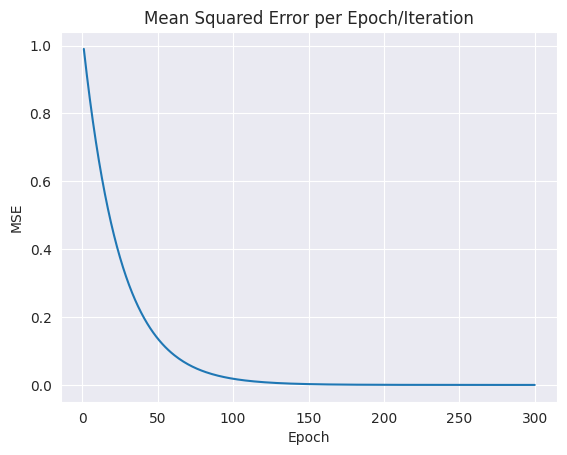

In [89]:
plt.plot(range(1, lr.n_iter+1), lr.losses_)

plt.title('Mean Squared Error per Epoch/Iteration')
plt.ylabel('MSE')
plt.xlabel('Epoch')

plt.show()

In [85]:
def plot_model(X, y, model):
  plt.scatter(X, y, edgecolor='red', s=70)
  plt.plot(X, model.predict(X), color='black', lw=2)

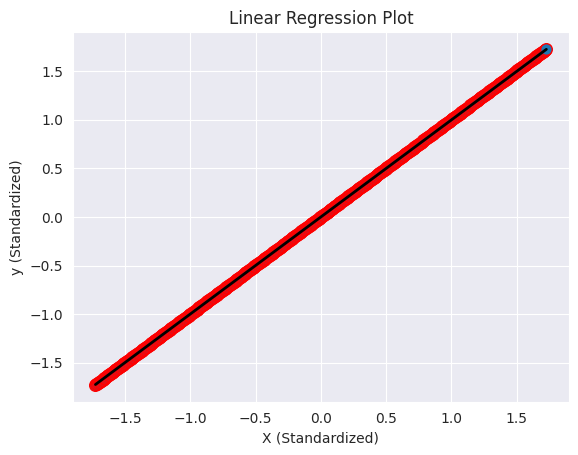

In [88]:
plot_model(X_std, y_std, lr)

plt.title("Linear Regression Plot")
plt.xlabel("X (Standardized)")
plt.ylabel("y (Standardized)")

plt.show()